In [6]:
import sys
assert sys.version_info >= (3,5)

#is this notebook running on Colab or Kaggle? # 코랩에서 실행되냐?
IS_COLAB = "google.colab" in sys.modules

#Scikit-learn >= 0.20 is required # 사이킷런 버전 설정
import sklearn
assert sklearn.__version__ >= "0.20"

#Common imports #당연히 임포트 하는 것들 
import numpy as np
import os

#to make this notebook's output stable across runs # ??
np.random.seed(42)

# To plot pretty figures # matplotlib 설정?
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

#Where to save the figures # 어디에 저장할지?
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "classification"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

#png로 저장하는 함수
def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [7]:
import pandas as pd

DATA_PATH = "datasets"

def load_data():
    csv_path = os.path.join(DATA_PATH, "winequality-red.csv")
    return pd.read_csv(csv_path) 

In [8]:
pd_train = load_data()

pd_train

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [9]:
pd_train.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

### 데이터 시각화 및 상관관계 조사

In [10]:
corr_matrix = pd_train.corr()

corr_matrix["quality"].sort_values(ascending=False)

quality                 1.000000
alcohol                 0.476166
sulphates               0.251397
citric acid             0.226373
fixed acidity           0.124052
residual sugar          0.013732
free sulfur dioxide    -0.050656
pH                     -0.057731
chlorides              -0.128907
density                -0.174919
total sulfur dioxide   -0.185100
volatile acidity       -0.390558
Name: quality, dtype: float64

array([[<AxesSubplot:xlabel='quality', ylabel='quality'>,
        <AxesSubplot:xlabel='alcohol', ylabel='quality'>,
        <AxesSubplot:xlabel='volatile acidity', ylabel='quality'>,
        <AxesSubplot:xlabel='sulphates', ylabel='quality'>,
        <AxesSubplot:xlabel='citric acid', ylabel='quality'>],
       [<AxesSubplot:xlabel='quality', ylabel='alcohol'>,
        <AxesSubplot:xlabel='alcohol', ylabel='alcohol'>,
        <AxesSubplot:xlabel='volatile acidity', ylabel='alcohol'>,
        <AxesSubplot:xlabel='sulphates', ylabel='alcohol'>,
        <AxesSubplot:xlabel='citric acid', ylabel='alcohol'>],
       [<AxesSubplot:xlabel='quality', ylabel='volatile acidity'>,
        <AxesSubplot:xlabel='alcohol', ylabel='volatile acidity'>,
        <AxesSubplot:xlabel='volatile acidity', ylabel='volatile acidity'>,
        <AxesSubplot:xlabel='sulphates', ylabel='volatile acidity'>,
        <AxesSubplot:xlabel='citric acid', ylabel='volatile acidity'>],
       [<AxesSubplot:xlabel='quality'

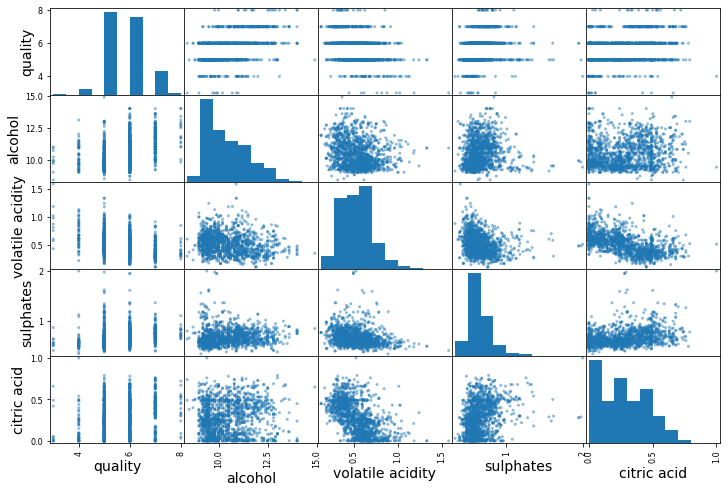

In [11]:
from pandas.plotting import scatter_matrix

attributes = ["quality", "alcohol", "volatile acidity", "sulphates", "citric acid"]

scatter_matrix(pd_train[attributes], figsize=(12, 8))

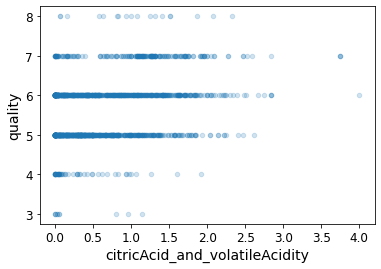

In [12]:
pd_train["citricAcid_and_volatileAcidity"] = pd_train["citric acid"] / pd_train["volatile acidity"]

pd_train.plot(kind = "scatter", y = "quality", x = "citricAcid_and_volatileAcidity", alpha = 0.2)
plt.show()

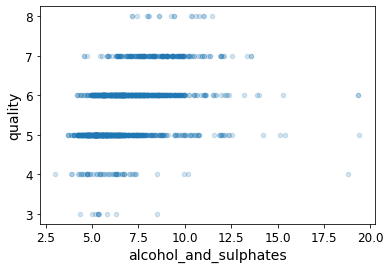

In [13]:
pd_train["alcohol_and_sulphates"] = pd_train["alcohol"] * pd_train["sulphates"]

pd_train.plot(kind = "scatter", y = "quality", x = "alcohol_and_sulphates", alpha = 0.2)
plt.show()

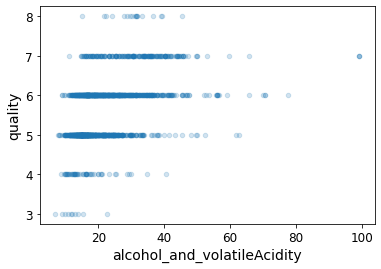

In [14]:
pd_train["alcohol_and_volatileAcidity"] = pd_train["alcohol"] / pd_train["volatile acidity"]

pd_train.plot(kind = "scatter", y = "quality", x = "alcohol_and_volatileAcidity", alpha = 0.2)
plt.show()

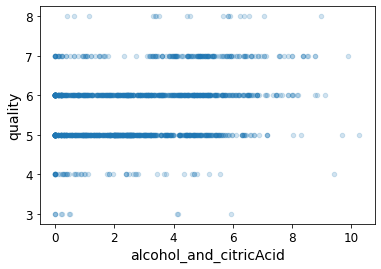

In [15]:
pd_train["alcohol_and_citricAcid"] = pd_train["alcohol"] * pd_train["citric acid"]

pd_train.plot(kind = "scatter", y = "quality", x = "alcohol_and_citricAcid", alpha = 0.2)
plt.show()

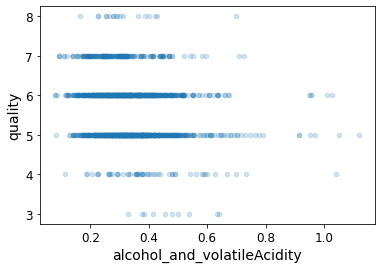

In [16]:
pd_train["alcohol_and_volatileAcidity"] = pd_train["sulphates"] * pd_train["volatile acidity"]

pd_train.plot(kind = "scatter", y = "quality", x = "alcohol_and_volatileAcidity", alpha = 0.2)
plt.show()

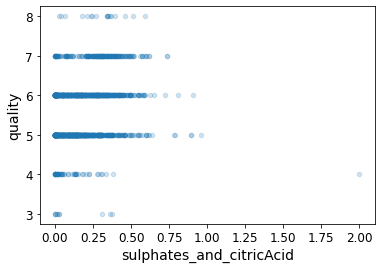

In [17]:
pd_train["sulphates_and_citricAcid"] = pd_train["sulphates"] * pd_train["citric acid"]

pd_train.plot(kind = "scatter", y = "quality", x = "sulphates_and_citricAcid", alpha = 0.2)
plt.show()

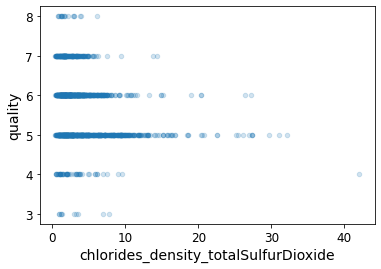

In [18]:
pd_train["chlorides_density_totalSulfurDioxide"] = pd_train["chlorides"] * pd_train["density"] * pd_train["total sulfur dioxide"]

pd_train.plot(kind = "scatter", y = "quality", x = "chlorides_density_totalSulfurDioxide", alpha = 0.2)
plt.show()

In [19]:
corr_matrix = pd_train.corr()

corr_matrix["quality"].sort_values(ascending=False)

quality                                 1.000000
alcohol                                 0.476166
alcohol_and_sulphates                   0.412858
citricAcid_and_volatileAcidity          0.318031
alcohol_and_citricAcid                  0.292002
sulphates                               0.251397
sulphates_and_citricAcid                0.242148
citric acid                             0.226373
fixed acidity                           0.124052
residual sugar                          0.013732
free sulfur dioxide                    -0.050656
pH                                     -0.057731
chlorides                              -0.128907
density                                -0.174919
total sulfur dioxide                   -0.185100
alcohol_and_volatileAcidity            -0.185151
chlorides_density_totalSulfurDioxide   -0.224433
volatile acidity                       -0.390558
Name: quality, dtype: float64

## Train Data, Target 분류

In [20]:
X = pd_train.drop(['quality'],axis=1).values
y = pd_train['quality'].values

In [21]:
print(X.shape)
print(y.shape)

print(X)
print(y)

(1599, 17)
(1599,)
[[7.4        0.7        0.         ... 0.         0.         2.5783152 ]
 [7.8        0.88       0.         ... 0.         0.         6.5449888 ]
 [7.8        0.76       0.04       ... 0.392      0.026      4.953096  ]
 ...
 [6.3        0.51       0.13       ... 1.43       0.0975     3.0270496 ]
 [5.9        0.645      0.12       ... 1.224      0.0852     3.285051  ]
 [6.         0.31       0.47       ... 5.17       0.3102     2.80130886]]
[5 5 5 ... 6 5 6]


## 데이터 순서 섞기

In [22]:
import numpy as np
shuffle_index = np.random.permutation(1599)
X_train, y_train = X[shuffle_index], y[shuffle_index]

---

In [23]:
def display_scores(scores):
    print("scores :", scores)
    print("mean :", scores.mean())
    print("standard deviation :", scores.std())

In [53]:
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.svm import SVR
import xgboost as xgb

## Random forest 

rmse : 0.565

In [29]:
forest_clf = RandomForestRegressor(random_state=42)

cv 검증

In [30]:
forest_mse = cross_val_score(forest_clf, X_train, y_train, cv=10, scoring="neg_mean_squared_error")

In [31]:
forest_rmse = np.sqrt(-forest_mse)
display_scores(forest_rmse)

scores : [0.56714251 0.51682807 0.59416591 0.56603556 0.57897485 0.5911049
 0.53150553 0.63855354 0.52637261 0.54885301]
mean : 0.565953646790423
standard deviation : 0.035113130717326343


## ExtraTreesRegressor

rmse : 0.553

In [33]:
extra_reg = ExtraTreesRegressor(random_state=42)

extra_reg_mse = cross_val_score(extra_reg, X_train, y_train, cv=10, scoring="neg_mean_squared_error")

In [34]:
extra_reg_rmse = np.sqrt(-extra_reg_mse)
display_scores(extra_reg_rmse)

scores : [0.54721054 0.52886789 0.59594935 0.56630822 0.56152415 0.57670887
 0.53680304 0.58795461 0.52729321 0.51672651]
mean : 0.5545346396279061
standard deviation : 0.025902941600635502


grid search

In [63]:
params_grid = [{'max_depth' : range(10, 500, 10), 'min_samples_split': [2, 4, 8, 10], 
                'min_samples_leaf': range(1, 10)}]

extra_model = GridSearchCV(ExtraTreesRegressor(random_state=42), params_grid, cv=10)
extra_model.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=ExtraTreesRegressor(random_state=42),
             param_grid=[{'max_depth': range(10, 500, 10),
                          'min_samples_leaf': range(1, 10),
                          'min_samples_split': [2, 4, 8, 10]}])

In [64]:
print('Best score:', extra_model.best_score_) 
print('Best max_depth:',extra_model.best_estimator_.max_depth)
print('Best min_samples_split:',extra_model.best_estimator_.min_samples_split)
print('Best min_samples_leaf:',extra_model.best_estimator_.min_samples_leaf)

Best score: 0.5249455752230723
Best max_depth: 20
Best min_samples_split: 4
Best min_samples_leaf: 1


In [65]:
extra_reg = ExtraTreesRegressor(max_depth = 20, min_samples_split = 4, random_state=42)

extra_reg_mse = cross_val_score(extra_reg, X_train, y_train, cv=10, scoring="neg_mean_squared_error")

In [66]:
extra_reg_rmse = np.sqrt(-extra_reg_mse)
display_scores(extra_reg_rmse)

scores : [0.55038971 0.52913181 0.59568417 0.54215595 0.55649108 0.58333546
 0.52997412 0.59216337 0.52898199 0.52390914]
mean : 0.5532216806280786
standard deviation : 0.026334531734186272


## SVR

rmse : 0.64

In [35]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)

In [36]:
params_grid = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]

svm_model = GridSearchCV(SVR(), params_grid, cv=10)
svm_model.fit(X_scaled, y_train)

GridSearchCV(cv=10, estimator=SVR(),
             param_grid=[{'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']},
                         {'C': [1, 10, 100, 1000], 'kernel': ['linear']}])

In [37]:
print('Best score:', svm_model.best_score_) 

print('Best C:',svm_model.best_estimator_.C) 
print('Best Kernel:',svm_model.best_estimator_.kernel)
print('Best Gamma:',svm_model.best_estimator_.gamma)

Best score: 0.35696213672531074
Best C: 10
Best Kernel: rbf
Best Gamma: 0.001


In [41]:
svr_model = SVR(C=10, kernel='rbf', gamma=0.001)

svr_model_mse = cross_val_score(svr_model, X_scaled, y_train, cv=10, scoring="neg_mean_squared_error")

In [42]:
svr_model_rmse = np.sqrt(-svr_model_mse)
display_scores(svr_model_rmse)

scores : [0.61892915 0.61866671 0.67378849 0.66423171 0.6639471  0.70700284
 0.65051313 0.70868324 0.54002772 0.59712167]
mean : 0.6442911754708284
standard deviation : 0.0491605022794487


## xgboost

rmse : 

In [45]:
params_grid = [{'learning_rate' : [0.1, 0.2, 0.3, 0.4, 0.5], 'n_estimators' : range(100, 400, 20), 'max_depth' : range(3, 11), 'gamma' : [1e-3, 1e-4, 1e-5], }]

xgb_model = GridSearchCV(xgb.XGBRegressor(seed = 42), params_grid, cv=10)
xgb_model.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    enable_categorical=False, gamma=None,
                                    gpu_id=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=0.2, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n...tors=100, n_jobs=None,
                                    num_parallel_tree=None, predictor=None,
                                    random_state=None, reg_alpha=None,
                                    reg_lambda=None, scale_pos_weight=None,
           

In [46]:
print('Best score:', xgb_model.best_score_) 
print('Best n_estimators:',xgb_model.best_estimator_.n_estimators)
print('Best max_depth:',xgb_model.best_estimator_.max_depth)
print('Best gamma:',xgb_model.best_estimator_.gamma)

Best score: 0.4955475789570065
Best n_estimators: 220
Best max_depth: 7
Best gamma: 0.001


In [47]:
xgb_model = xgb.XGBRegressor(learning_rate = 0.2, n_estimators = 220, max_depth = 7, gamma = 0.001, seed = 42)

xgb_model_mse = cross_val_score(xgb_model, X_train, y_train, cv=10, scoring="neg_mean_squared_error")

In [48]:
xgb_model_rmse = np.sqrt(-xgb_model_mse)
display_scores(xgb_model_rmse)

scores : [0.54446277 0.54037866 0.61280011 0.56672563 0.55789339 0.62675329
 0.57853585 0.66603294 0.53418928 0.6106212 ]
mean : 0.5838393117157428
standard deviation : 0.041294140444313704


## 결론

가장 좋은 rmse는 ExtraTreesRegressor의 결과인 0.553이다.